In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [2]:
df = pd.read_csv('candytime.csv', encoding="latin9")

In [3]:
totalRecords = df.shape[1] * df.shape[0]
totalRecords

295200

In [4]:
df.head(5)

,Internal ID,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,...,DESPAIR OTHER,OTHER COMMENTS,DRESS,Unnamed: 113,DAY,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [5]:
#Row 0 was used to remove | symbol and the Q from the headers
df = df.drop(df.index[0])

In [6]:
df.head(5)

,Internal ID,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,...,DESPAIR OTHER,OTHER COMMENTS,DRESS,Unnamed: 113,DAY,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],"Click Coordinates (x, y)"
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
5,90272852,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"(75, 23)"


In [7]:
df['GENDER'].unique()

array(['Male', 'Female', "I'd rather not say", nan, 'Other'], dtype=object)

In [8]:
df['COUNTRY'].value_counts()

USA               699
United States     497
usa               217
Canada            179
Usa               139
                 ... 
32                  1
France              1
canada              1
United kingdom      1
Canada`             1
Name: COUNTRY, Length: 128, dtype: int64

In [9]:
df['COUNTRY'] = df['COUNTRY'].str.lower()

In [10]:
df['COUNTRY'].value_counts()

usa                                                                     1056
united states                                                            554
canada                                                                   215
us                                                                       182
usa                                                                       74
                                                                        ... 
alaska                                                                     1
ussa                                                                       1
narnia                                                                     1
i pretend to be from canada, but i am really from the united states.       1
can                                                                        1
Name: COUNTRY, Length: 104, dtype: int64

In [11]:
df['COUNTRY'] = df['COUNTRY'].replace(['Murica', 'United States of America', 'u.s.a.', 'USAUSAUSA', 'america',	'unhinged states', 'US of A', 'The United States', 'North Carolina', 'U S', 'u.s.', 'unite states', 'USA? Hard to tell anymore..', 'usas', 'united states', 'us', ' usa', 'usa '], 'usa')

In [12]:
df = df.replace(to_replace ='united states of america', value = 'usa', regex = True)

In [13]:
df = df.replace(to_replace ='united states', value = 'usa', regex = True)

In [14]:
df = df.replace(to_replace ='united kingdom', value = 'uk', regex = True)

In [15]:
df['COUNTRY'].value_counts()

usa               1956
canada             215
usa                 49
uk                  31
germany             10
                  ... 
ireland              1
california           1
europe               1
ahem....amerca       1
can                  1
Name: COUNTRY, Length: 91, dtype: int64

In [16]:
df = df.drop(df[(df['COUNTRY']!= 'usa') & (df['COUNTRY']!= 'canada') & (df['COUNTRY']!= 'uk') & (df['COUNTRY']!= 'germany') & (df['COUNTRY']!= 'united kingdom')].index)

In [17]:
df['COUNTRY'].value_counts()

usa        1956
canada      215
uk           31
germany      10
Name: COUNTRY, dtype: int64

In [18]:
df.head(5)

,Internal ID,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,...,DESPAIR OTHER,OTHER COMMENTS,DRESS,Unnamed: 113,DAY,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],"Click Coordinates (x, y)"
1,90272821,No,Male,44,usa,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,usa,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,usa,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
6,90272853,No,Male,53,usa,Colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df['Filled Cells'] = df.count(axis = 'columns')

In [20]:
df['Filled Cells'].value_counts().sort_values()

117      1
40       1
64       1
34       1
18       1
      ... 
116    126
114    183
115    240
113    431
6      513
Name: Filled Cells, Length: 77, dtype: int64

In [21]:
#Search for duplicates
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
data2 = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 2212
Number of rows after discarding duplicates = 2212


In [22]:
import matplotlib.pyplot as plt

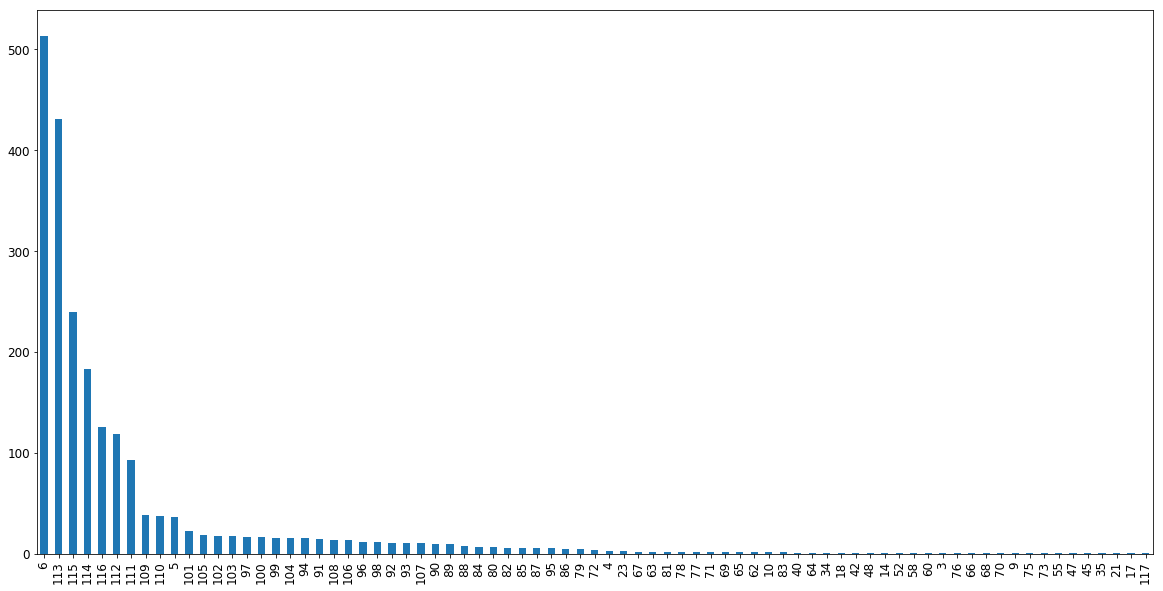

In [23]:
df['Filled Cells'].value_counts().plot(kind='bar', figsize=(20,10), fontsize = 12)

In [24]:
 df['Filled Cells'].value_counts().reset_index(name="count").query("count > 10")["index"]

0       6
1     113
2     115
3     114
4     116
5     112
6     111
7     109
8     110
9       5
10    101
11    105
12    102
13    103
14     97
15    100
16     99
17    104
18     94
19     91
20    108
21    106
22     96
23     98
24     92
25     93
26    107
Name: index, dtype: int64

In [25]:
df['ZSCORE'] = zscore(df['Filled Cells'])

In [26]:
 df['ZSCORE'].value_counts().reset_index(name="count").query("count > 10")["index"]

0    -1.677126
1     0.665405
2     0.709190
3     0.687298
4     0.731083
5     0.643512
6     0.621619
7     0.577834
8     0.599726
9    -1.699018
10    0.402691
11    0.490262
12    0.446477
13    0.424584
14    0.315120
15    0.380798
16    0.468369
17    0.358905
18    0.249441
19    0.183763
20    0.555941
21    0.512155
22    0.337013
23    0.293227
24    0.534048
25    0.227549
26    0.205656
Name: index, dtype: float64

In [27]:
df['Filled Cells'].max()
df.describe()

,Internal ID,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],Filled Cells,ZSCORE
count,2.212000e+03,79.0,1261.0,93.0,58.0,2212.000000,2.212000e+03
mean,9.028020e+07,1.0,1.0,1.0,1.0,82.606239,-4.022300e-16
std,7.428921e+03,0.0,0.0,0.0,0.0,45.687433,1.000226e+00
min,9.027282e+07,1.0,1.0,1.0,1.0,3.000000,-1.742804e+00
25%,9.027517e+07,1.0,1.0,1.0,1.0,6.000000,-1.677126e+00
50%,9.027787e+07,1.0,1.0,1.0,1.0,111.000000,6.216191e-01
75%,9.028248e+07,1.0,1.0,1.0,1.0,113.000000,6.654047e-01
max,9.031480e+07,1.0,1.0,1.0,1.0,117.000000,7.529760e-01


In [28]:
df = df.drop(df[df['Filled Cells'] < 8].index)

In [29]:
df.describe()

,Internal ID,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],Filled Cells,ZSCORE
count,1.658000e+03,79.0,1261.0,93.0,58.0,1658.000000,1658.000000
mean,9.028003e+07,1.0,1.0,1.0,1.0,108.231001,0.560998
std,7.266971e+03,0.0,0.0,0.0,0.0,12.721390,0.278507
min,9.027282e+07,1.0,1.0,1.0,1.0,9.000000,-1.611447
25%,9.027520e+07,1.0,1.0,1.0,1.0,109.000000,0.577834
50%,9.027767e+07,1.0,1.0,1.0,1.0,113.000000,0.665405
75%,9.028220e+07,1.0,1.0,1.0,1.0,114.000000,0.687298
max,9.031480e+07,1.0,1.0,1.0,1.0,117.000000,0.752976


In [30]:
df.to_csv('CleanOne.csv', index=False)

In [31]:
recordsAfterCleaning = df.shape[1] * df.shape[0]
recordsAfterCleaning

202276

### Sampling

In [32]:
sample1 = df.sample(n=5)

In [33]:
sample1

,Internal ID,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,...,DRESS,Unnamed: 113,DAY,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],"Click Coordinates (x, y)",Filled Cells,ZSCORE
1404,90279045,No,Male,28,usa,New York,DESPAIR,DESPAIR,JOY,DESPAIR,...,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(77, 26)",114,0.687298
1642,90281205,No,Male,44,usa,IL,JOY,DESPAIR,JOY,DESPAIR,...,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(64, 30)",114,0.687298
1673,90281380,No,Male,39,usa,ct,JOY,DESPAIR,JOY,DESPAIR,...,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(65, 42)",113,0.665405
963,90276800,No,Female,34,usa,Ohio,MEH,DESPAIR,JOY,NaN,...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(76, 22)",101,0.402691
1432,90279195,No,Female,53,usa,Illinois,JOY,DESPAIR,JOY,NaN,...,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(76, 30)",48,-0.757628


In [34]:
sample2 = df.sample(frac=0.01, random_state=1)
sample2

,Internal ID,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,...,DRESS,Unnamed: 113,DAY,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],"Click Coordinates (x, y)",Filled Cells,ZSCORE
1212,90277678,Yes,Female,49,usa,PA,JOY,MEH,JOY,NaN,...,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(74, 25)",89,0.139977
1090,90277208,No,Male,38,usa,Virginia,MEH,MEH,JOY,MEH,...,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(73, 26)",113,0.665405
1002,90276941,No,Female,54,usa,Washington,JOY,DESPAIR,JOY,NaN,...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(59, 6)",96,0.293227
2396,90303987,No,Male,39,canada,Alberta,MEH,MEH,JOY,MEH,...,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(66, 31)",113,0.665405
1644,90281229,No,Male,16,usa,Maine,JOY,MEH,JOY,DESPAIR,...,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(77, 22)",116,0.731083
594,90275117,No,Male,63,usa,Wisconsin,MEH,MEH,JOY,DESPAIR,...,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(74, 36)",115,0.709190
595,90275125,No,Female,50,usa,mississippi,JOY,MEH,JOY,MEH,...,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(83, 37)",113,0.665405
1916,90283777,Yes,Male,43,usa,NJ,MEH,DESPAIR,JOY,DESPAIR,...,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(79, 24)",113,0.665405
1617,90281015,No,Male,46,usa,Kentucky,JOY,JOY,JOY,MEH,...,Blue and black,NaN,Friday,NaN,NaN,1.0,NaN,"(33, 54)",113,0.665405
134,90273137,NaN,Female,65,usa,Maine,MEH,JOY,JOY,DESPAIR,...,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(74, 7)",111,0.621619


In [35]:
sample3 = df.sample(frac=0.01, replace=True, random_state=1)
sample3

,Internal ID,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,...,DRESS,Unnamed: 113,DAY,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],"Click Coordinates (x, y)",Filled Cells,ZSCORE
1558,90280554,No,Male,34,usa,va,MEH,DESPAIR,JOY,MEH,...,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(76, 22)",113,0.665405
360,90273732,No,Male,35,usa,Alabama,MEH,DESPAIR,JOY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,-0.451128
1607,90280930,No,Female,42,canada,ontario,JOY,JOY,JOY,NaN,...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(69, 31)",109,0.577834
1327,90278675,No,Male,55,usa,Ohio,JOY,DESPAIR,JOY,MEH,...,Blue and black,NaN,Sunday,NaN,NaN,1.0,NaN,"(33, 81)",114,0.687298
1053,90277135,No,Male,53,usa,IA,JOY,MEH,JOY,NaN,...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(71, 35)",102,0.424584
1241,90277967,NaN,Male,49,usa,CA,JOY,DESPAIR,JOY,DESPAIR,...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(82, 28)",112,0.643512
1411,90279092,Yes,Male,90,usa,Arkansas,JOY,MEH,JOY,MEH,...,White and gold,NaN,Friday,NaN,NaN,1.0,NaN,"(32, 71)",112,0.643512
218,90273348,No,Male,39,usa,"VT, Chittenden",MEH,DESPAIR,JOY,DESPAIR,...,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(63, 14)",65,-0.385450
197,90273301,No,Male,41,usa,Massachusetts,JOY,MEH,JOY,DESPAIR,...,White and gold,NaN,Sunday,NaN,NaN,1.0,NaN,"(22, 66)",113,0.665405
2381,90300435,No,Male,37,usa,Utah,MEH,MEH,MEH,MEH,...,White and gold,NaN,Sunday,NaN,NaN,NaN,NaN,NaN,111,0.621619


In [36]:
df.isnull().sum(axis = 0).sort_values()

Internal ID              0
Filled Cells             0
COUNTRY                  0
ZSCORE                   0
GENDER                   5
                      ... 
OTHER COMMENTS        1313
MEDIA [ESPN]          1565
MEDIA [Daily Dish]    1579
MEDIA [Yahoo]         1600
Unnamed: 113          1650
Length: 122, dtype: int64

In [37]:
#Keep only the rows with at least 2 non-na values:
df.dropna(axis=1, thresh=400, inplace = True)

In [38]:
df.isnull().sum(axis = 0).sort_values()

Internal ID                0
Filled Cells               0
COUNTRY                    0
ZSCORE                     0
GENDER                     5
                        ... 
Maynards                 335
JoyJoy (Mit Iodine!)     338
MEDIA [Science]          397
JOY OTHER                822
DESPAIR OTHER           1002
Length: 117, dtype: int64

In [39]:
#Rename columns to more readable and less symbols
df.rename(columns={'STATE, PROVINCE, COUNTY, ETC': 'State'}, inplace=True)
df.rename(columns={'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)': 'Brown globs'}, inplace=True)


In [40]:
df.head(3)

,Internal ID,GOING OUT?,GENDER,AGE,COUNTRY,State,100 Grand Bar,Brown globs,Any full-sized candy bar,Black Jacks,...,Whole Wheat anything,York Peppermint Patties,JOY OTHER,DESPAIR OTHER,DRESS,DAY,MEDIA [Science],"Click Coordinates (x, y)",Filled Cells,ZSCORE
1,90272821,No,Male,44,usa,NM,MEH,DESPAIR,JOY,MEH,...,DESPAIR,DESPAIR,Mounds,NaN,White and gold,Sunday,1.0,"(84, 25)",115,0.709190
3,90272840,No,Male,40,usa,or,MEH,DESPAIR,JOY,MEH,...,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,White and gold,Sunday,1.0,"(75, 23)",115,0.709190
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,DESPAIR,JOY,NaN,NaN,White and gold,Friday,1.0,"(70, 10)",111,0.621619


In [41]:
print(df['MEDIA [Science]'])
print(df['Click Coordinates (x, y)'])

1       1.0
3       1.0
4       1.0
7       1.0
8       1.0
       ... 
2454    1.0
2455    NaN
2456    1.0
2457    1.0
2459    NaN
Name: MEDIA [Science], Length: 1658, dtype: float64
1       (84, 25)
3       (75, 23)
4       (70, 10)
7        (55, 5)
8       (76, 24)
          ...   
2454    (68, 39)
2455         NaN
2456    (70, 26)
2457    (67, 35)
2459    (19, 26)
Name: Click Coordinates (x, y), Length: 1658, dtype: object


In [42]:
df = df.drop(df.columns[[114, 113]], axis=1)

In [43]:
df['100 Grand Bar'].unique()

array(['MEH', 'JOY', nan, 'DESPAIR'], dtype=object)

In [44]:
df['Black Jacks'].nunique()

3

In [45]:
df.groupby('GENDER').count()

,Internal ID,GOING OUT?,AGE,COUNTRY,State,100 Grand Bar,Brown globs,Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,JOY OTHER,DESPAIR OTHER,DRESS,DAY,Filled Cells,ZSCORE
GENDER,,,,,,,,,,,,,,,,,,,,,
Female,578,570,573,578,572,545,554,571,467,454,...,518,549,551,568,320,252,550,553,578,578
I'd rather not say,46,44,44,46,46,44,45,45,40,38,...,42,43,43,44,29,21,43,42,46,46
Male,1006,965,999,1006,998,966,964,999,861,842,...,928,946,954,979,470,367,959,976,1006,1006
Other,23,22,23,23,23,19,22,23,14,15,...,20,22,22,22,16,15,21,21,23,23


In [46]:
df.groupby('AGE').nunique()

,Internal ID,GOING OUT?,GENDER,AGE,COUNTRY,State,100 Grand Bar,Brown globs,Any full-sized candy bar,Black Jacks,...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,JOY OTHER,DESPAIR OTHER,DRESS,DAY,Filled Cells,ZSCORE
AGE,,,,,,,,,,,,,,,,,,,,,
10,2,1,2,1,2,2,2,2,2,2,...,2,1,1,2,1,1,2,2,1,1
100,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,1,1
11,4,1,2,1,1,4,2,1,2,2,...,3,1,1,2,4,2,2,2,4,4
12,7,2,2,1,1,6,2,3,2,2,...,3,3,2,2,4,4,2,2,6,6
13,4,2,1,1,1,4,1,1,1,2,...,3,2,2,1,2,2,2,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ancient,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,1,1
no,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
old,1,1,1,1,1,1,1,0,0,0,...,0,0,0,1,0,0,1,1,1,1


In [47]:
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

In [48]:
df['AGE'].median()

43.0

In [77]:
df['AGE'].value_counts().sort_values()

99.0      1
7.0       1
90.0      1
17.0      1
100.0     1
         ..
34.0     59
40.0     61
44.0     61
37.0     63
43.0     87
Name: AGE, Length: 77, dtype: int64

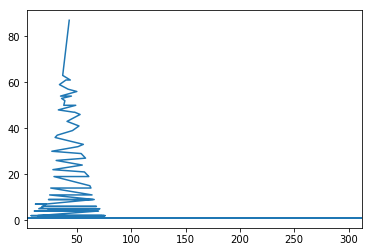

In [78]:
#age distribution
df['AGE'].value_counts().plot()

In [50]:
df.columns[df.isna().any()].tolist()

['GOING OUT?',
 'GENDER',
 'AGE',
 'State',
 '100 Grand Bar',
 'Brown globs',
 'Any full-sized candy bar',
 'Black Jacks',
 'Bonkers (the candy)',
 'Bonkers (the board game)',
 'Bottle Caps',
 "Box'o'Raisins",
 'Broken glow stick',
 'Butterfinger',
 'Cadbury Creme Eggs',
 'Candy Corn',
 'Candy that is clearly just the stuff given out for free at restaurants',
 'Caramellos',
 'Cash, or other forms of legal tender',
 'Chardonnay',
 'Chick-o-Sticks',
 'Chiclets',
 'Coffee Crisp',
 'Creepy Religious comics/Chick Tracts',
 'Dental paraphenalia',
 'Dots',
 'Dove Bars',
 'Fuzzy Peaches',
 'Generic Brand Acetaminophen',
 'Glow sticks',
 'Goo Goo Clusters',
 "Good N' Plenty",
 'Gum from baseball cards',
 'Gummy Bears straight up',
 'Hard Candy',
 'Healthy Fruit',
 'Heath Bar',
 "Hershey's Dark Chocolate",
 "Hershey's Milk Chocolate",
 "Hershey's Kisses",
 'Hugs (actual physical hugs)',
 'Jolly Rancher (bad flavor)',
 'Jolly Ranchers (good flavor)',
 'JoyJoy (Mit Iodine!)',
 'Junior Mints',
 'Se

In [51]:
# Convert all missing values in the specified column to the median
df['AGE'] = df['AGE'].fillna((df['AGE'].median()))

In [52]:
df.columns[df.isna().any()].tolist()

['GOING OUT?',
 'GENDER',
 'State',
 '100 Grand Bar',
 'Brown globs',
 'Any full-sized candy bar',
 'Black Jacks',
 'Bonkers (the candy)',
 'Bonkers (the board game)',
 'Bottle Caps',
 "Box'o'Raisins",
 'Broken glow stick',
 'Butterfinger',
 'Cadbury Creme Eggs',
 'Candy Corn',
 'Candy that is clearly just the stuff given out for free at restaurants',
 'Caramellos',
 'Cash, or other forms of legal tender',
 'Chardonnay',
 'Chick-o-Sticks',
 'Chiclets',
 'Coffee Crisp',
 'Creepy Religious comics/Chick Tracts',
 'Dental paraphenalia',
 'Dots',
 'Dove Bars',
 'Fuzzy Peaches',
 'Generic Brand Acetaminophen',
 'Glow sticks',
 'Goo Goo Clusters',
 "Good N' Plenty",
 'Gum from baseball cards',
 'Gummy Bears straight up',
 'Hard Candy',
 'Healthy Fruit',
 'Heath Bar',
 "Hershey's Dark Chocolate",
 "Hershey's Milk Chocolate",
 "Hershey's Kisses",
 'Hugs (actual physical hugs)',
 'Jolly Rancher (bad flavor)',
 'Jolly Ranchers (good flavor)',
 'JoyJoy (Mit Iodine!)',
 'Junior Mints',
 'Senior Min

In [53]:
df = df.drop(df.columns[[114, 113]], axis=1)

In [54]:
df.head(3)

,Internal ID,GOING OUT?,GENDER,AGE,COUNTRY,State,100 Grand Bar,Brown globs,Any full-sized candy bar,Black Jacks,...,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,JOY OTHER,DESPAIR OTHER,DRESS,DAY
1,90272821,No,Male,44.0,usa,NM,MEH,DESPAIR,JOY,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,White and gold,Sunday
3,90272840,No,Male,40.0,usa,or,MEH,DESPAIR,JOY,MEH,...,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,White and gold,Sunday
4,90272841,No,Male,23.0,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,White and gold,Friday


# Extra side research to find the best candy:
## Replace all the Despair, meh, joy with 1, 5, 10
## Count sum for each column => Candy rating

In [55]:
df['Brown globs'].value_counts()

DESPAIR    1002
MEH         427
JOY         161
Name: Brown globs, dtype: int64

In [56]:
df2 = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 112, 111, 110, 109]], axis=1)
df2.head(2)

,100 Grand Bar,Brown globs,Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR


In [57]:
for c in df2.columns:
    print (df[c].value_counts())

JOY        800
MEH        703
DESPAIR     74
Name: 100 Grand Bar, dtype: int64
DESPAIR    1002
MEH         427
JOY         161
Name: Brown globs, dtype: int64
JOY        1431
MEH         195
DESPAIR      17
Name: Any full-sized candy bar, dtype: int64
DESPAIR    744
MEH        567
JOY         74
Name: Black Jacks, dtype: int64
MEH        799
DESPAIR    455
JOY         99
Name: Bonkers (the candy), dtype: int64
MEH        665
DESPAIR    497
JOY        171
Name: Bonkers (the board game), dtype: int64
MEH        623
DESPAIR    512
JOY        429
Name: Bottle Caps, dtype: int64
DESPAIR    1098
MEH         438
JOY          96
Name: Box'o'Raisins, dtype: int64
DESPAIR    1493
MEH          99
JOY          22
Name: Broken glow stick, dtype: int64
JOY        1084
MEH         426
DESPAIR     127
Name: Butterfinger, dtype: int64
JOY        750
MEH        516
DESPAIR    367
Name: Cadbury Creme Eggs, dtype: int64
DESPAIR    684
MEH        518
JOY        439
Name: Candy Corn, dtype: int64
DESPAIR   

# At this step additional tools were utilized to process data

## Candylicious - what's the best candy

In [58]:
#after using additional tools for reprocessing the file is loaded back into Jupyter
candy = pd.read_csv('candyrating.csv', encoding="latin9")
candy = candy.sort_values(by='Rating', ascending=False)
candy.head(20)

,Candy Name,Rating
2,Any full-sized candy bar,15302
75,ReeseÕs Peanut Butter Cups,14771
44,Kit Kat,14673
14,"Cash, or other forms of legal tender",14603
96,Twix,14396
83,Snickers,14296
94,Tolberone something or other,13865
57,Peanut M&MÕs,13738
49,Lindt Truffle,13559
69,Nestle Crunch,13296


# Tensorflow

In [59]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

In [60]:
df5=pd.read_csv("pokemon.csv",na_values=['NA','?'])
df5

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,45,49,49,65,65,45,1,0,Grass
1,60,62,63,80,80,60,1,0,Grass
2,80,82,83,100,100,80,1,0,Grass
3,80,100,123,122,120,80,1,0,Grass
4,39,52,43,60,50,65,1,0,Fire
...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1,Rock
796,50,160,110,160,110,110,6,1,Rock
797,80,110,60,150,130,70,6,1,Psychic
798,80,160,60,170,130,80,6,1,Psychic


In [61]:
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [62]:
encode_text_index(df5,'Type')   # label encoding
df5 = df5.sort_values(by='Type', ascending=False)
df5

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
400,55,104,105,94,75,52,3,0,17
204,95,85,85,65,65,35,2,0,17
665,91,72,90,129,90,108,5,0,17
178,75,38,38,56,56,67,2,0,17
179,125,58,58,76,76,67,2,0,17
...,...,...,...,...,...,...,...,...,...
214,75,90,140,60,60,40,2,0,0
213,50,65,90,35,35,15,2,0,0
615,50,75,45,40,45,60,5,0,0
616,70,135,105,60,105,20,5,0,0


In [63]:
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [64]:
x,y = to_xy(df5,'Type')

C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  


In [65]:
x

array([[ 55., 104., 105., ...,  52.,   3.,   0.],
       [ 95.,  85.,  85., ...,  35.,   2.,   0.],
       [ 91.,  72.,  90., ..., 108.,   5.,   0.],
       ...,
       [ 50.,  75.,  45., ...,  60.,   5.,   0.],
       [ 70., 135., 105., ...,  20.,   5.,   0.],
       [ 50.,  40.,  85., ...,  25.,   5.,   0.]], dtype=float32)

In [66]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
from sklearn import preprocessing
import pandas as pd
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()
df5['encoded_type'] = le.fit_transform(df5['Type'])

df5[0:5]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,encoded_type
400,55,104,105,94,75,52,3,0,17,17
204,95,85,85,65,65,35,2,0,17,17
665,91,72,90,129,90,108,5,0,17,17
178,75,38,38,56,56,67,2,0,17,17
179,125,58,58,76,76,67,2,0,17,17


In [68]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(df5[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Generation', 'Legendary', 'Type']], df5['encoded_type'], test_size=0.25, random_state=42)

In [69]:
x_train.shape

(600, 9)

In [70]:
y_train.shape

(600,)

In [71]:
x_test.shape

(200, 9)

In [72]:
y_test.shape

(200,)

In [73]:
x_train.median()

HP            65.0
Attack        75.0
Defense       70.0
Sp. Atk       65.0
Sp. Def       70.0
Speed         65.0
Generation     3.0
Legendary      0.0
Type          10.0
dtype: float64

In [74]:
x_train.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000
mean,69.190000,79.118333,74.491667,72.841667,71.993333,67.715000,3.35000,0.085000,9.593333
std,24.766972,32.348339,32.347497,32.837231,28.109373,28.800629,1.68292,0.279114,5.539473
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.000000,0.000000
25%,50.000000,55.000000,50.000000,48.750000,50.000000,45.000000,2.00000,0.000000,5.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.000000,10.000000
75%,80.000000,100.000000,90.000000,95.000000,89.250000,90.000000,5.00000,0.000000,14.000000
max,250.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.000000,17.000000


In [75]:
x_test.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
count,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,69.46500,78.65000,71.895000,72.755000,71.630000,69.965000,3.245000,0.070000,9.09000
std,27.77546,32.86148,27.379227,32.456774,27.037348,29.836132,1.596156,0.255787,5.69862
min,20.00000,10.00000,10.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.00000
25%,50.00000,55.00000,50.750000,50.000000,50.000000,50.000000,2.000000,0.000000,4.00000
50%,65.50000,75.00000,70.000000,65.000000,66.000000,66.000000,3.000000,0.000000,9.00000
75%,80.50000,100.00000,86.500000,95.000000,90.000000,95.000000,5.000000,0.000000,14.00000
max,255.00000,185.00000,180.000000,175.000000,160.000000,160.000000,6.000000,1.000000,17.00000


In [76]:
x_test.median()

HP            65.5
Attack        75.0
Defense       70.0
Sp. Atk       65.0
Sp. Def       66.0
Speed         66.0
Generation     3.0
Legendary      0.0
Type           9.0
dtype: float64